# 第三讲 神经网络搭建八股

## 1 tf.keras 搭建网络八股 

### 1.1 keras 介绍 

### 1.2 搭建神经网络六部法

### 1.3 函数用法介绍 

## 2 iris 数据集代码复现

In [2]:
import tensorflow as tf
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target 

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.fit(x_train, y_train, epochs=500,validation_freq=20, validation_split=0.2)

model.summary()  

2023-09-15 23:02:49.588398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
4/4 [==============================] - 1s 5ms/step - loss: 1.5795 - sparse_categorical_accuracy: 0.3583
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.9551 - sparse_categorical_accuracy: 0.5750
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.6674 - sparse_categorical_accuracy: 0.7083
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5799 - sparse_categorical_accuracy: 0.7250
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 0.8316 - sparse_categorical_accuracy: 0.6167
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6429 - sparse_categorical_accuracy: 0.6833
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 1.0809 - sparse_categorical_accuracy: 0.6500
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5899 - sparse_categorical_accuracy: 0.7583
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0

In [3]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from tensorflow.keras import Model

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target 

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)

class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(3, activation="sigmoid")

    def call(self, x):
        y = self.d1(x)
        return y


model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.fit(x_train, y_train, epochs=500,validation_freq=20, validation_split=0.2)

model.summary()  

Epoch 1/500
4/4 [==============================] - 1s 4ms/step - loss: 1.4893 - sparse_categorical_accuracy: 0.4417
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.9073 - sparse_categorical_accuracy: 0.6917
Epoch 3/500
4/4 [==============================] - 0s 15ms/step - loss: 0.9455 - sparse_categorical_accuracy: 0.6417
Epoch 4/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7559 - sparse_categorical_accuracy: 0.6917
Epoch 5/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6255 - sparse_categorical_accuracy: 0.7250
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.7508 - sparse_categorical_accuracy: 0.7083
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5402 - sparse_categorical_accuracy: 0.7750
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5702 - sparse_categorical_accuracy: 0.6833
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss:

## 3 MNIST 数据集 

### 3.1 介绍 

### 3.2 导入数据集

11490434/11490434 [==============================] - 149s 13us/step


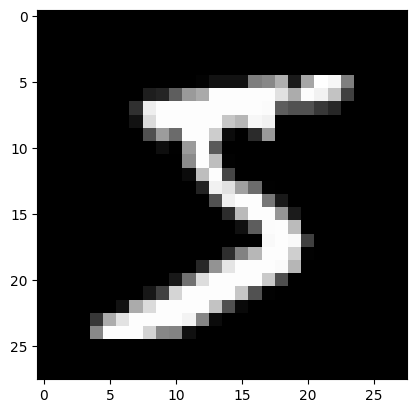

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt 


mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap='gray')

In [6]:
print('x_train[0]', x_train[0])

x_train[0] [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253

In [7]:
print('y_train[0]', y_train[0])

y_train[0] 5


In [8]:
print('x_test.shape', x_test.shape)

x_test.shape (10000, 28, 28)


### 3.3 训练 MNIST 数据集

In [9]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.fit(x_train, y_train, epochs=10,validation_freq=20, validation_data=(x_test, y_test))

model.summary()

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2613 - sparse_categorical_accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1164 - sparse_categorical_accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - sparse_categorical_accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0369 - sparse_categorical_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0239 - sparse_categorical_accuracy: 0.9926
Epoch 9/10
1875/1875 [==========

In [14]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test/255.0

class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten(input_shape=(28, 28))
        self.dense1 = Dense(128, activation="relu")
        self.dense2 = Dense(10, activation="sigmoid")

    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        y = self.dense2(x)
        return y 
model = MnistModel()

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.fit(x_train, y_train, epochs=10, validation_freq=20, validation_data=(x_test, y_test))

model.summary()

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2589 - sparse_categorical_accuracy: 0.9261
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1119 - sparse_categorical_accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0770 - sparse_categorical_accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0570 - sparse_categorical_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0346 - sparse_categorical_accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0228 - sparse_categorical_accuracy: 0.9929
Epoch 9/10
1875/1875 [======

## 4 Fashion_mnist 数据

In [15]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/ 255.0, x_test/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
model.fit(x_train, y_train, epochs=10,validation_freq=20, validation_data=(x_test, y_test))

model.summary()

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4947 - sparse_categorical_accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3709 - sparse_categorical_accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3318 - sparse_categorical_accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3105 - sparse_categorical_accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2924 - sparse_categorical_accuracy: 0.8935
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2753 - sparse_categorical_accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2663 - sparse_categorical_accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2535 - spars